In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))



In [82]:
train = pd.read_csv("../input/train_data.csv")
test = pd.read_csv("../input/test_data.csv")
published = pd.read_csv("../input/published_land_price.csv")

In [83]:
'''import json

with open("names.json", "r", encoding="utf-8") as f:
     d = json.load(f)

train = train.rename(columns=d)
test = test.rename(columns=d)
'''



'import json\n\nwith open("names.json", "r", encoding="utf-8") as f:\n     d = json.load(f)\n\ntrain = train.rename(columns=d)\ntest = test.rename(columns=d)\n'

## data size

In [84]:
train.shape, test.shape, published.shape

((356344, 28), (34844, 27), (2602, 116))

In [175]:
res1 = pd.read_csv("../output/result_realestate_202008010_01.csv")
res2 = pd.read_csv("../output/result_realestate_20200809_03.csv")
score1 = 0.27
score2 = 0.28

In [178]:
res_omikuji = pd.DataFrame()
res_omikuji["id"] = res1["id"]
res_omikuji["y"] = res1["y"]*(score1/(score1+score2)) + res2["y"]*(score2/(score1+score2))
display(res1.head())
res_omikuji.head()
res_omikuji.to_csv("res_omikuji.csv", index=False)

,id,y
0,0,28.114116
1,1,15.869071
2,2,222.928913
3,3,25.269130
4,4,69.260580


,id,y
0,0,28.570348
1,1,15.877830
2,2,222.401871
3,3,25.443916
4,4,68.155393


## check dtypes

In [85]:
train.dtypes

id              int64
種類             object
地域             object
市区町村コード         int64
都道府県名          object
市区町村名          object
地区名            object
最寄駅：名称         object
最寄駅：距離（分）      object
間取り            object
面積（㎡）          object
土地の形状          object
間口             object
延床面積（㎡）        object
建築年            object
建物の構造          object
用途             object
今後の利用目的        object
前面道路：方位        object
前面道路：種類        object
前面道路：幅員（ｍ）    float64
都市計画           object
建ぺい率（％）       float64
容積率（％）        float64
取引時点           object
改装             object
取引の事情等         object
y             float64
dtype: object

In [86]:
published.dtypes

id           int64
経度         float64
緯度         float64
所在地コード       int64
用途           int64
            ...   
属性移動Ｈ２７      int64
属性移動Ｈ２８      int64
属性移動Ｈ２９      int64
属性移動Ｈ３０      int64
属性移動Ｈ３１      int64
Length: 116, dtype: object

## check null

In [87]:
train.isnull().sum()

id                 0
種類                 0
地域            159406
市区町村コード            0
都道府県名              0
市区町村名              0
地区名              246
最寄駅：名称          1551
最寄駅：距離（分）      10129
間取り           202568
面積（㎡）              0
土地の形状         159801
間口            176081
延床面積（㎡）       236201
建築年            82841
建物の構造          78829
用途             81061
今後の利用目的       244965
前面道路：方位       159830
前面道路：種類       161971
前面道路：幅員（ｍ）    163065
都市計画            3447
建ぺい率（％）         5386
容積率（％）          5386
取引時点               0
改装            212071
取引の事情等        328208
y                  0
dtype: int64

In [88]:
test.isnull().sum()

id                0
種類                0
地域            17443
市区町村コード           0
都道府県名             0
市区町村名             0
地区名               0
最寄駅：名称          137
最寄駅：距離（分）       161
間取り           18193
面積（㎡）             0
土地の形状         17447
間口            18949
延床面積（㎡）       23446
建築年            6664
建物の構造          6637
用途            12134
今後の利用目的        2756
前面道路：方位       17443
前面道路：種類       17668
前面道路：幅員（ｍ）    17766
都市計画            279
建ぺい率（％）         385
容積率（％）          385
取引時点              0
改装            19767
取引の事情等        32342
dtype: int64

In [89]:
published.isnull().sum()

id         0
経度         0
緯度         0
所在地コード     0
用途         0
          ..
属性移動Ｈ２７    0
属性移動Ｈ２８    0
属性移動Ｈ２９    0
属性移動Ｈ３０    0
属性移動Ｈ３１    0
Length: 116, dtype: int64

## 種類

<AxesSubplot:>

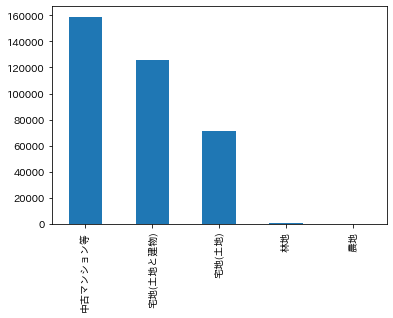

In [90]:
train["種類"].value_counts().plot.bar()
# trainとtestでほぼ分布変わらない印象。

<AxesSubplot:>

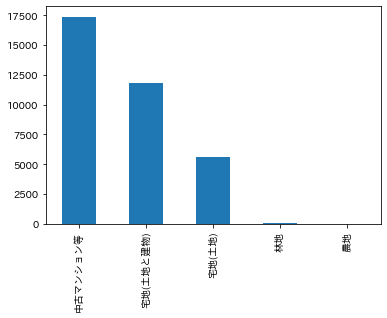

In [91]:
test["種類"].value_counts().plot.bar()

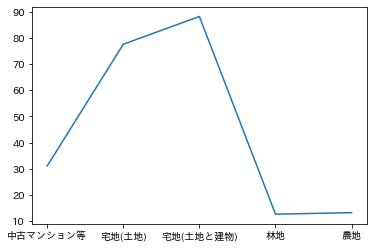

In [155]:
ts = df.groupby('種類', as_index=False).agg({'y': 'mean'})
#ts = ts.sort_values("種類")
display(plt.plot(ts["種類"], ts["y"]))

<AxesSubplot:>

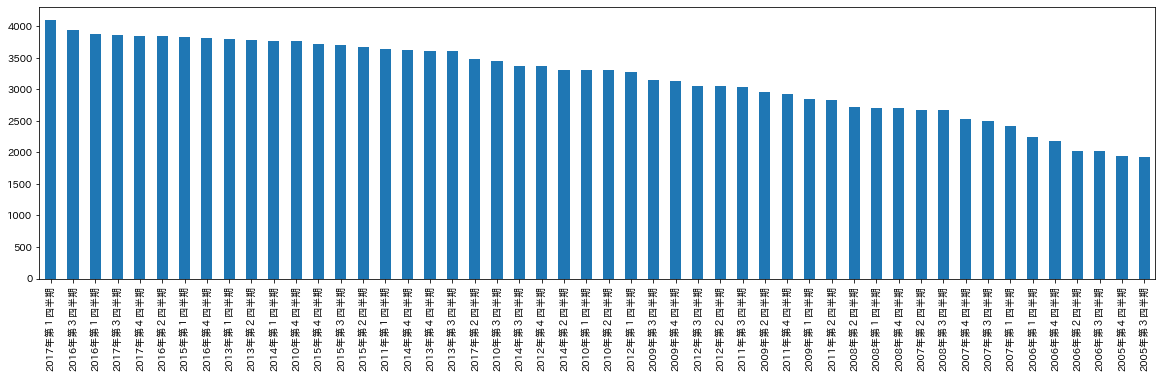

In [157]:
df_tyuko = train[train["種類"]=="中古マンション等"]
df_tyuko["取引時点"].value_counts().plot.bar(figsize=(20, 5))

## 地域

<AxesSubplot:>

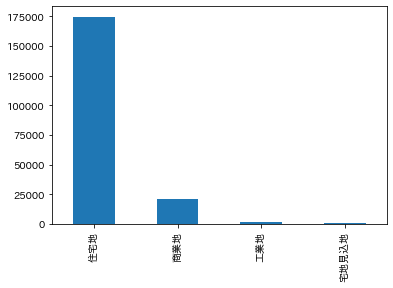

In [92]:
train["地域"].value_counts().plot.bar()
# trainとtestでほぼ分布変わらない印象。

<AxesSubplot:>

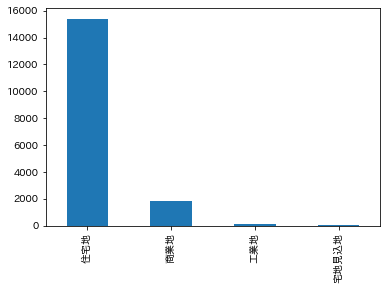

In [93]:
test["地域"].value_counts().plot.bar()

## 市区町村コード

<AxesSubplot:>

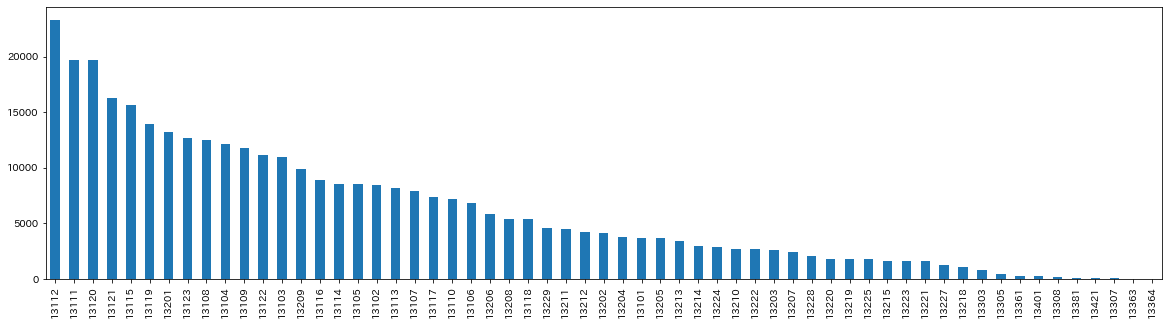

In [94]:
train["市区町村コード"].value_counts().plot.bar(figsize=(20, 5))
# 上位はこんな感じ、13112 : 世田谷区、13111 : 大田区、13120 : 練馬区、13121 : 足立区、13115 : 杉並区、都心の住宅街が多い

<AxesSubplot:>

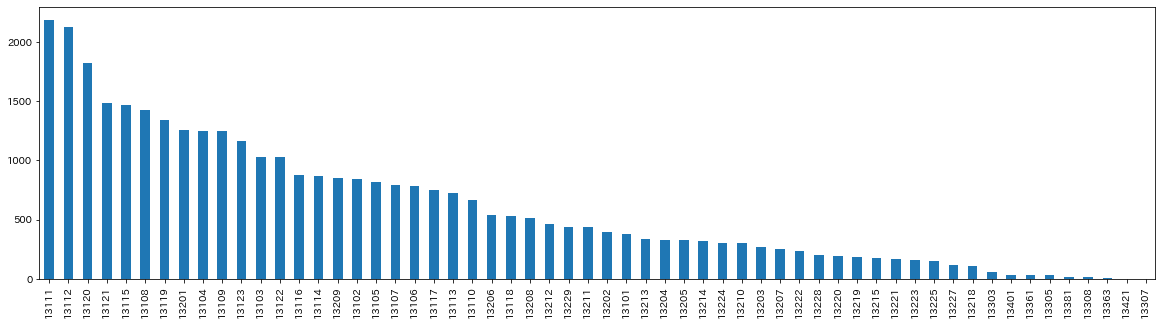

In [95]:
test["市区町村コード"].value_counts().plot.bar(figsize=(20, 5))

## 都道府県名

<AxesSubplot:>

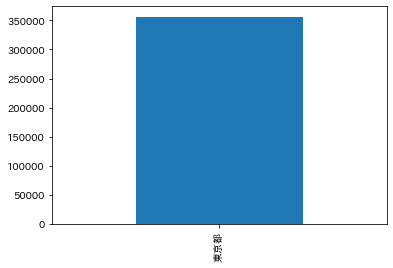

In [96]:
train["都道府県名"].value_counts().plot.bar()

<AxesSubplot:>

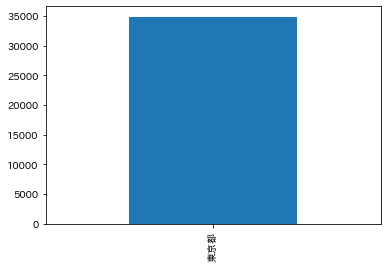

In [97]:
test["都道府県名"].value_counts().plot.bar()

## 市区町村名

<AxesSubplot:>

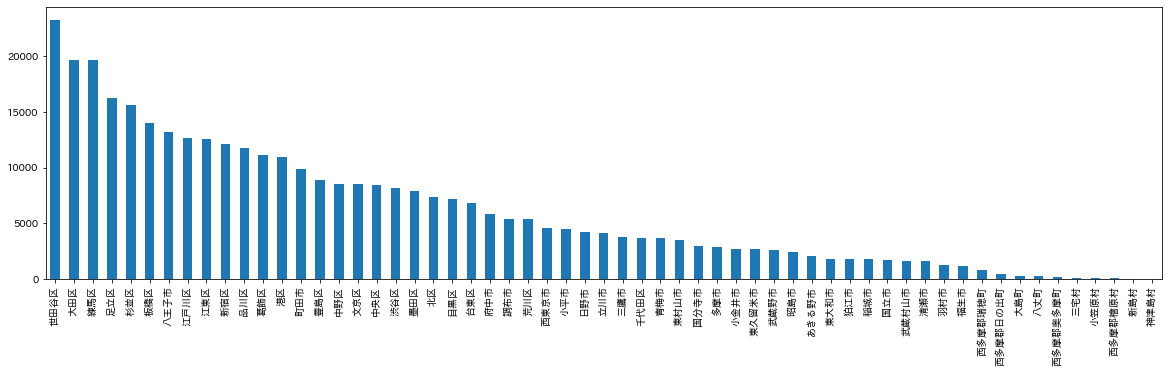

In [98]:
train["市区町村名"].value_counts().plot.bar(figsize=(20, 5))
# 当たり前だけど市区町村コードと全く同じ情報なので、この特徴量はいらない

<AxesSubplot:>

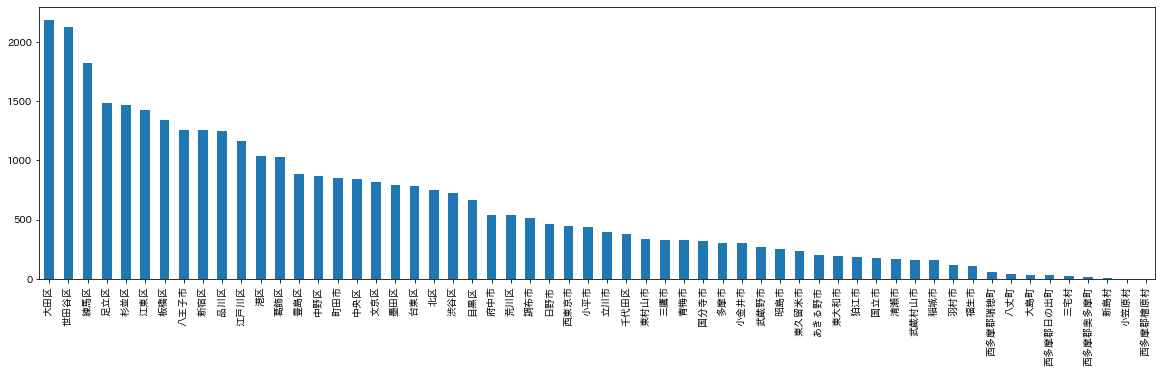

In [99]:
test["市区町村名"].value_counts().plot.bar(figsize=(20, 5))

## 地区名

In [100]:
train["地区名"].value_counts()
# 値の種類が多いため数で表示、数の多い上位3地区はtrainとtestで変わらない、数の少ない値はまとめる

本町       3199
中央       2108
亀戸       1849
中町       1611
栄町       1493
         ... 
梅澤          1
神田松永町       1
下元郷         1
字名組山        1
西大泉町        1
Name: 地区名, Length: 1454, dtype: int64

In [101]:
test["地区名"].value_counts()

本町           321
中央           226
亀戸           183
南大井          156
西新宿          156
            ... 
大字富士山栗原新田      1
東篠崎            1
元赤坂            1
大丹波            1
真光寺町           1
Name: 地区名, Length: 1366, dtype: int64

## 最寄駅：名称

In [102]:
train["最寄駅：名称"].value_counts()
# 数の少ない値はまとめる

八王子       3315
大泉学園      3020
新小岩       2927
金町        2306
三鷹        2182
          ... 
東所沢          2
遊園地西         1
桜ケ丘          1
武蔵小杉         1
青海(東京)       1
Name: 最寄駅：名称, Length: 655, dtype: int64

In [103]:
test["最寄駅：名称"].value_counts()

八王子        316
新小岩        265
大森(東京)     231
大泉学園       225
武蔵小金井      220
          ... 
早稲田(都電)      1
学習院下         1
堀切           1
町屋二丁目        1
白丸           1
Name: 最寄駅：名称, Length: 626, dtype: int64

## 最寄駅：距離（分）

<AxesSubplot:>

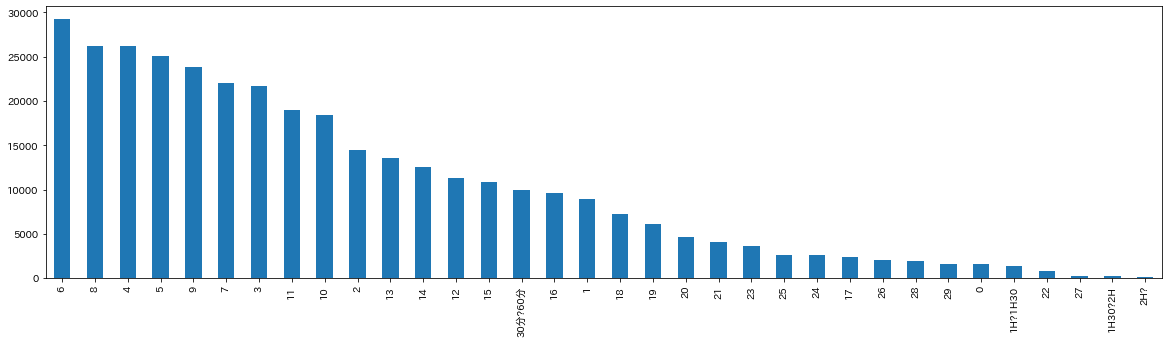

In [104]:
train["最寄駅：距離（分）"].value_counts().plot.bar(figsize=(20, 5))
# rainとtestで分布自体はあんま変わらない印象。一部文字列になっている値があるため前処理時に値に変換する

<AxesSubplot:>

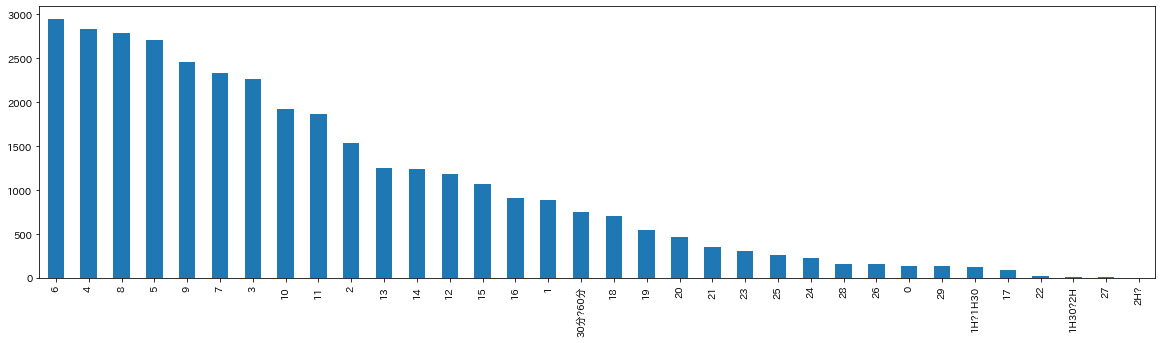

In [105]:
test["最寄駅：距離（分）"].value_counts().plot.bar(figsize=(20, 5))

## 間取り

<AxesSubplot:>

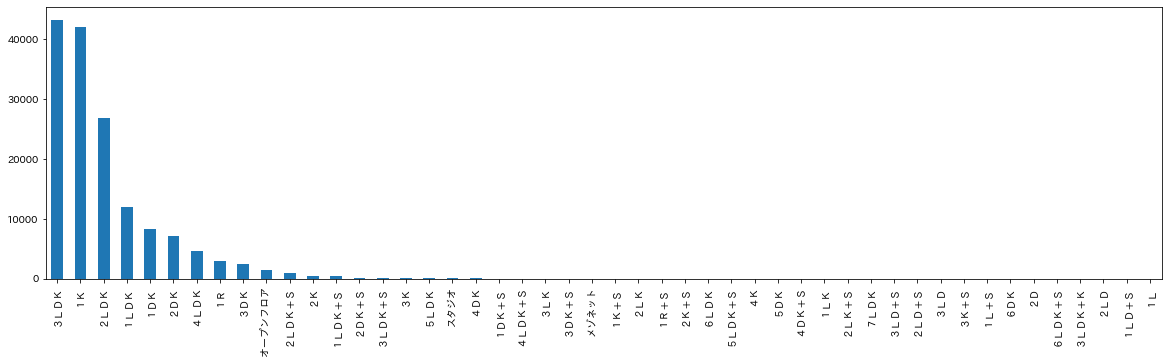

In [106]:
train["間取り"].value_counts().plot.bar(figsize=(20, 5))

<AxesSubplot:>

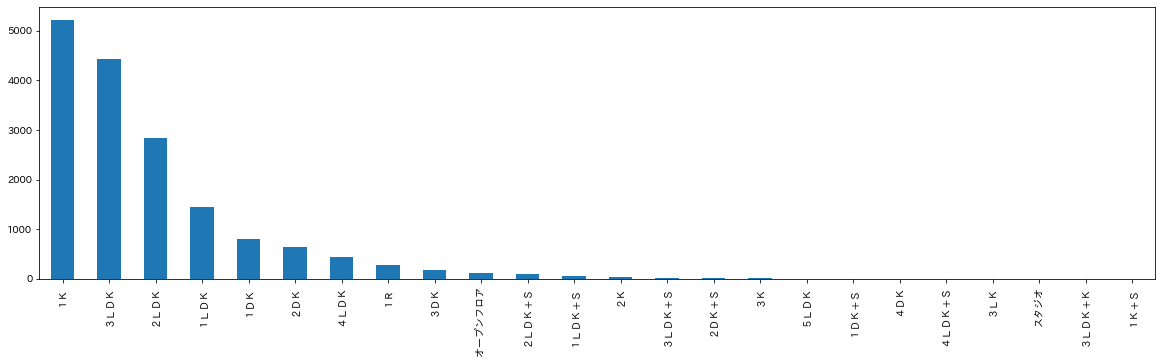

In [107]:
test["間取り"].value_counts().plot.bar(figsize=(20, 5))

## 面積（㎡）

<AxesSubplot:>

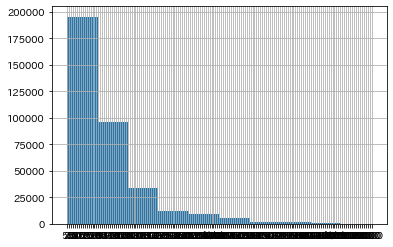

In [108]:
train["面積（㎡）"].hist()
# 分かりづらい。笑 よって数の方も載せとく

In [109]:
train["面積（㎡）"].value_counts()

20      25395
65      19968
70      19695
60      19218
55      18439
        ...  
4500        1
4300        1
3800        1
4000        1
4900        1
Name: 面積（㎡）, Length: 157, dtype: int64

<AxesSubplot:>

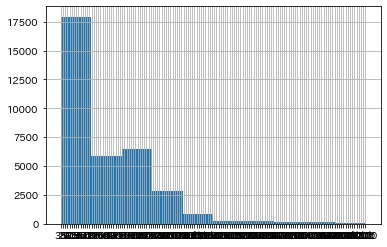

In [110]:
test["面積（㎡）"].hist()

In [111]:
test["面積（㎡）"].value_counts()

20      3122
65      2034
70      1922
55      1837
60      1831
        ... 
2100       1
2700       1
2800       1
3000       1
3500       1
Name: 面積（㎡）, Length: 140, dtype: int64

## 土地の形状

<AxesSubplot:>

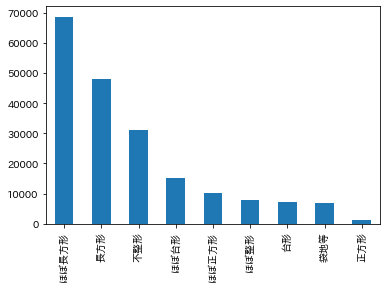

In [112]:
train["土地の形状"].value_counts().plot.bar()

<AxesSubplot:>

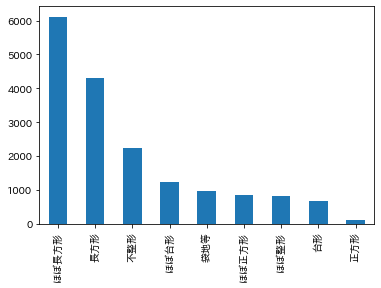

In [113]:
test["土地の形状"].value_counts().plot.bar()

## 間口

<AxesSubplot:>

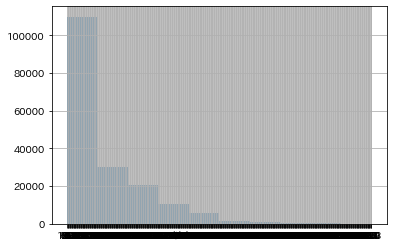

In [114]:
train["間口"].hist()
# 気持ち悪いから数の方も載せる

In [115]:
train["間口"].value_counts()

8.0     8136
10.0    8024
7.0     7579
9.0     7397
6.0     7285
        ... 
49.9       1
48.1       1
41.4       1
43.6       1
49.6       1
Name: 間口, Length: 472, dtype: int64

<AxesSubplot:>

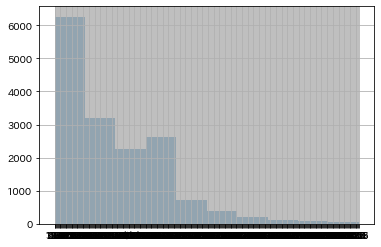

In [116]:
test["間口"].hist()

In [117]:
test["間口"].value_counts()

10.0    528
9.0     515
7.0     477
6.0     473
8.0     469
       ... 
1.4       1
27.9      1
33.1      1
38.4      1
24.3      1
Name: 間口, Length: 359, dtype: int64

## 延床面積（㎡）

<AxesSubplot:>

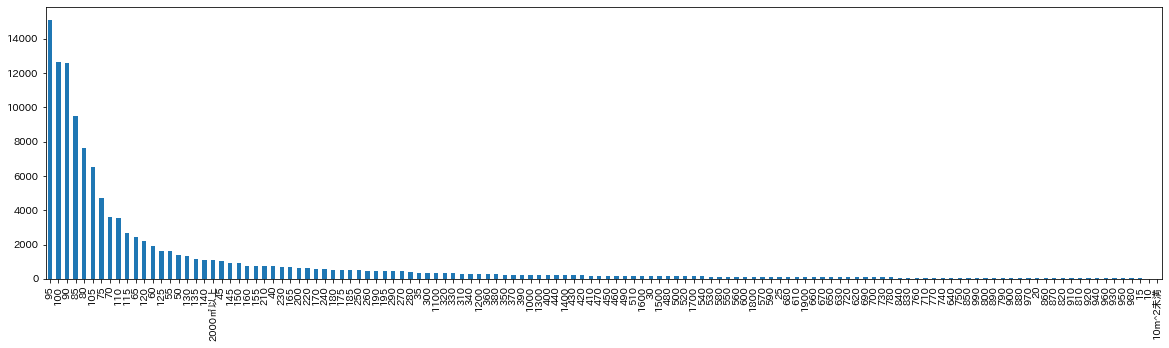

In [118]:
train["延床面積（㎡）"].value_counts().plot.bar(figsize=(20, 5))
# これも文字列が混じっているため前処理で数値に変換

<AxesSubplot:>

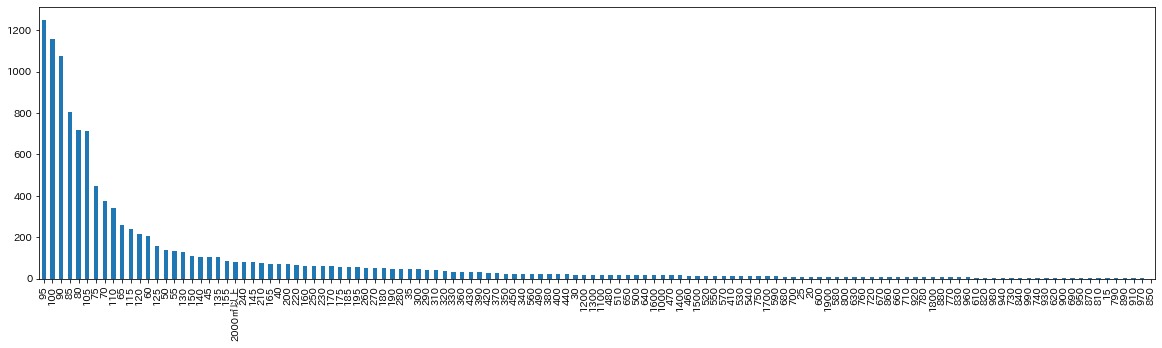

In [119]:
test["延床面積（㎡）"].value_counts().plot.bar(figsize=(20, 5))

## 建築年

<AxesSubplot:>

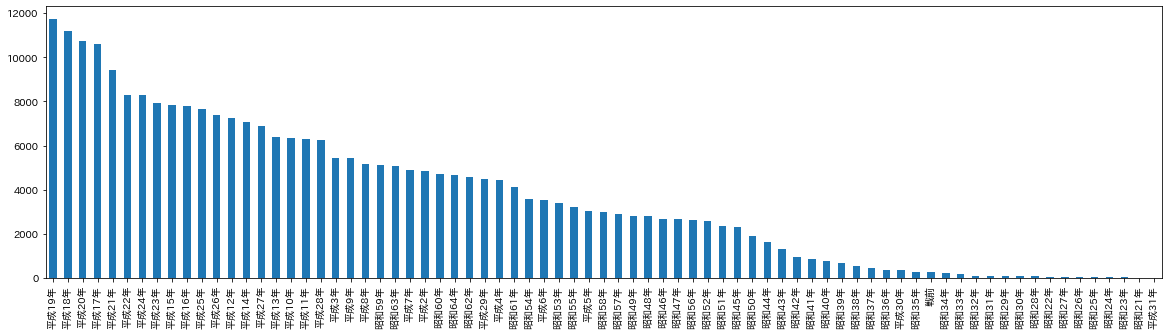

In [120]:
train["建築年"].value_counts().plot.bar(figsize=(20, 5))
# trainに比べtestの方が最近建てられた物件が多い気がする。うまくモデルで考慮したい

<AxesSubplot:>

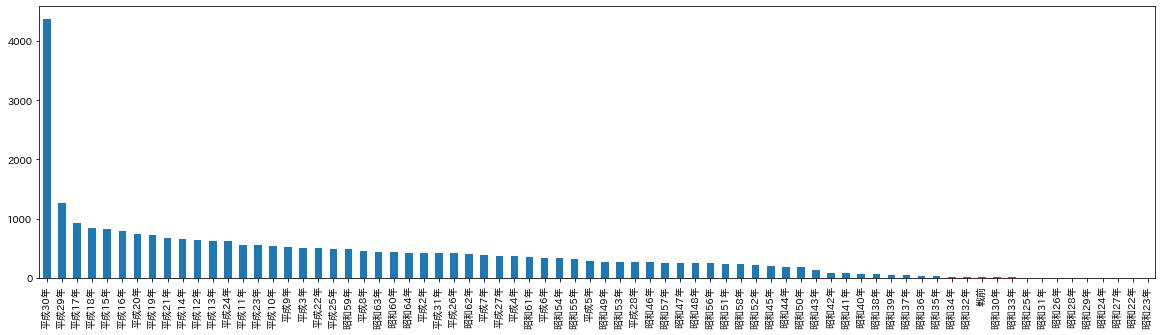

In [121]:
test["建築年"].value_counts().plot.bar(figsize=(20, 5))

## 建物の構造

<AxesSubplot:>

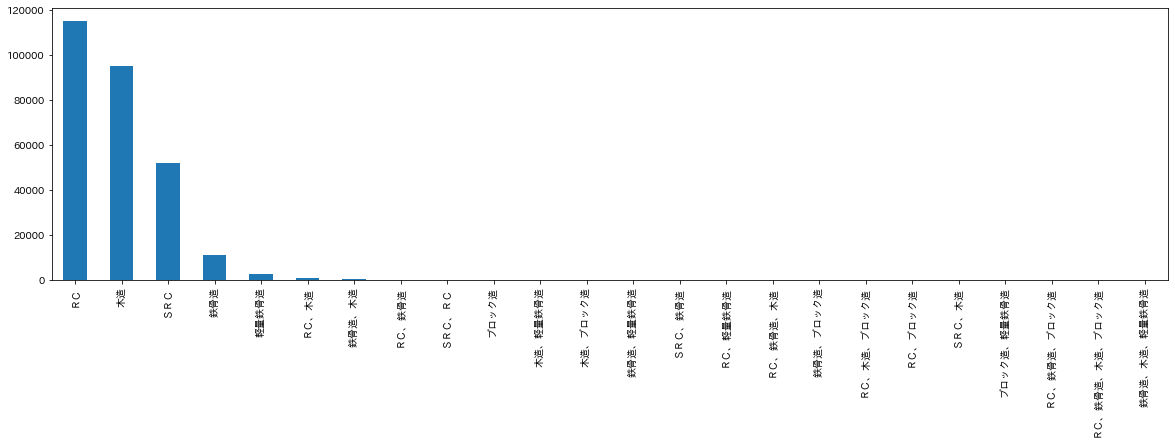

In [122]:
train["建物の構造"].value_counts().plot.bar(figsize=(20, 5))
# trainとtestでほぼ分布変わらない印象。

<AxesSubplot:>

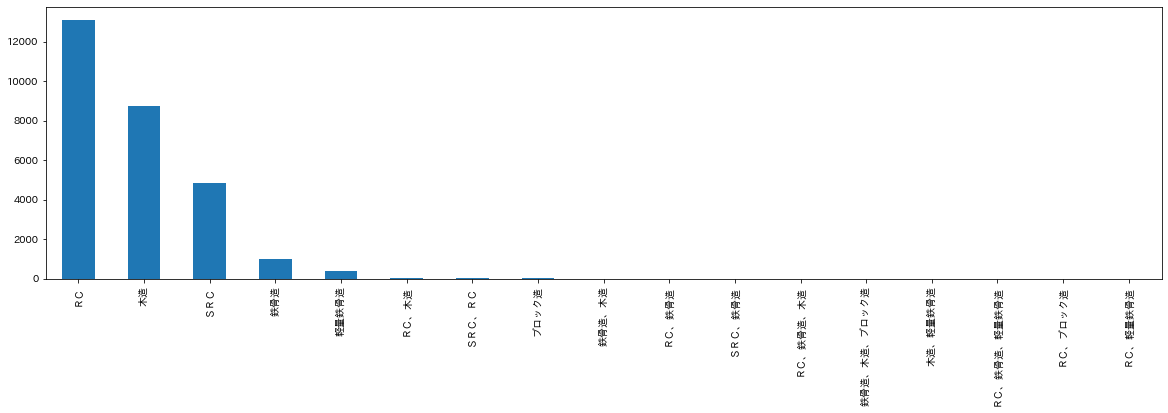

In [123]:
test["建物の構造"].value_counts().plot.bar(figsize=(20, 5))

## 用途

In [124]:
train["用途"].value_counts()

住宅                    245908
共同住宅                    9991
事務所                     2480
住宅、店舗                   2433
店舗                      1674
                       ...  
共同住宅、工場、事務所、駐車場、店舗         1
共同住宅、事務所、倉庫、その他            1
工場、倉庫、店舗                   1
住宅、工場、事務所、その他              1
住宅、共同住宅、事務所、倉庫、駐車場         1
Name: 用途, Length: 202, dtype: int64

In [125]:
test["用途"].value_counts()

住宅                19594
共同住宅               1326
住宅、店舗               204
共同住宅、店舗             162
事務所                 156
                  ...  
住宅、事務所、その他            1
事務所、作業場、倉庫、店舗         1
事務所、作業場、倉庫、駐車場        1
住宅、工場、倉庫              1
駐車場、その他               1
Name: 用途, Length: 106, dtype: int64

## 今後の利用目的

<AxesSubplot:>

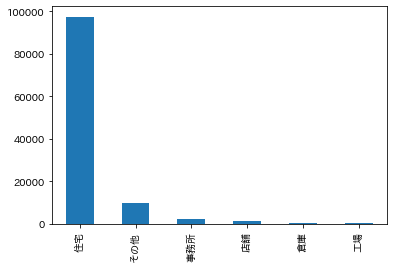

In [126]:
train["今後の利用目的"].value_counts().plot.bar()
# trainとtestで分布変わらない

<AxesSubplot:>

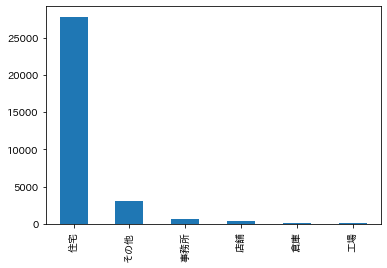

In [127]:
test["今後の利用目的"].value_counts().plot.bar()

## 前面道路：方位

<AxesSubplot:>

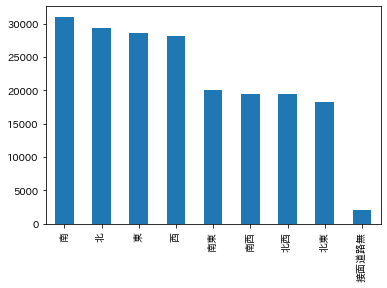

In [128]:
train["前面道路：方位"].value_counts().plot.bar()
# trainとtestで分布変わらない

<AxesSubplot:>

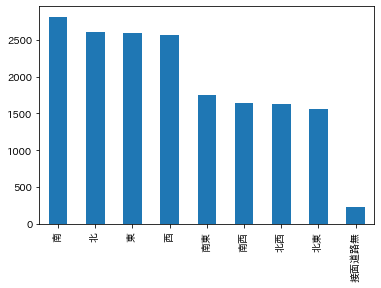

In [129]:
test["前面道路：方位"].value_counts().plot.bar()

## 前面道路：種類

<AxesSubplot:>

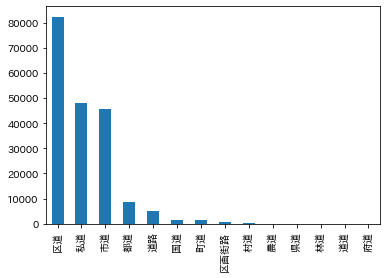

In [130]:
train["前面道路：種類"].value_counts().plot.bar()
# これもほぼ変わらん

<AxesSubplot:>

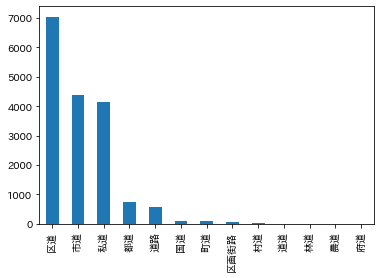

In [131]:
test["前面道路：種類"].value_counts().plot.bar()

## 前面道路：幅員（ｍ）

<AxesSubplot:>

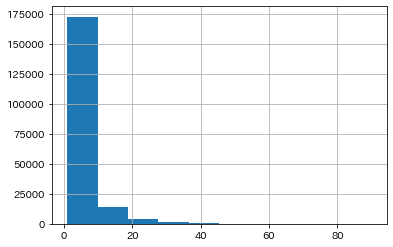

In [132]:
train["前面道路：幅員（ｍ）"].hist()

<AxesSubplot:>

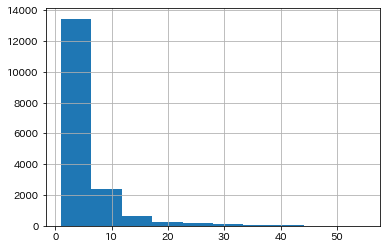

In [133]:
test["前面道路：幅員（ｍ）"].hist()

## 都市計画

<AxesSubplot:>

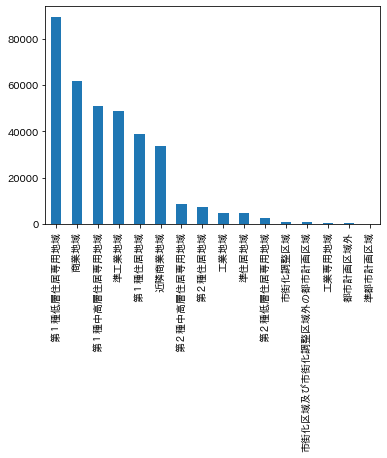

In [134]:
train["都市計画"].value_counts().plot.bar()
# ほぼ変わらんのではなかろうか

<AxesSubplot:>

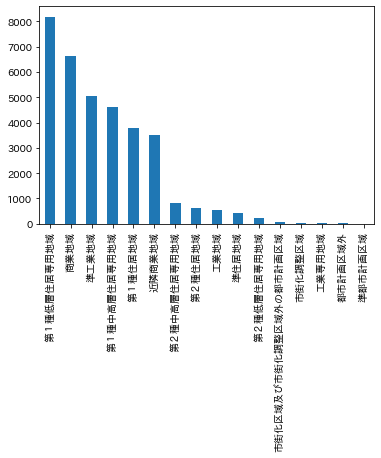

In [135]:
test["都市計画"].value_counts().plot.bar()

## 建ぺい率（％）

<AxesSubplot:>

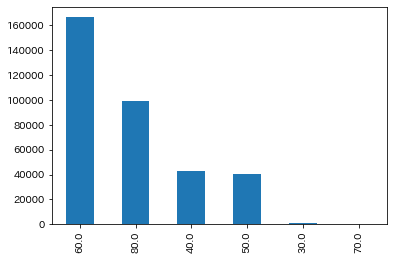

In [136]:
train["建ぺい率（％）"].value_counts().plot.bar()

<AxesSubplot:>

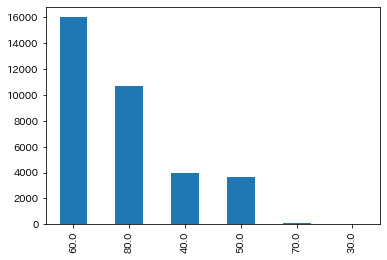

In [137]:
test["建ぺい率（％）"].value_counts().plot.bar()

## 容積率（％）

<AxesSubplot:>

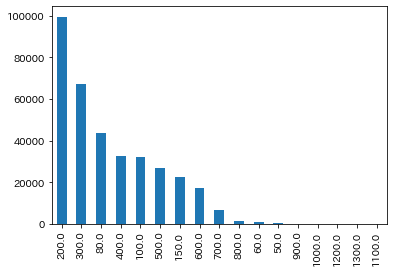

In [138]:
train["容積率（％）"].value_counts().plot.bar()

<AxesSubplot:>

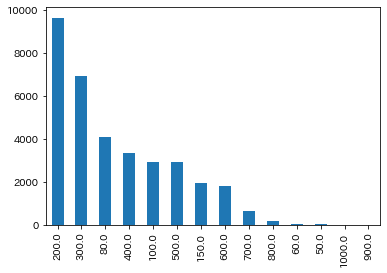

In [139]:
test["容積率（％）"].value_counts().plot.bar()

## 取引時点

<AxesSubplot:>

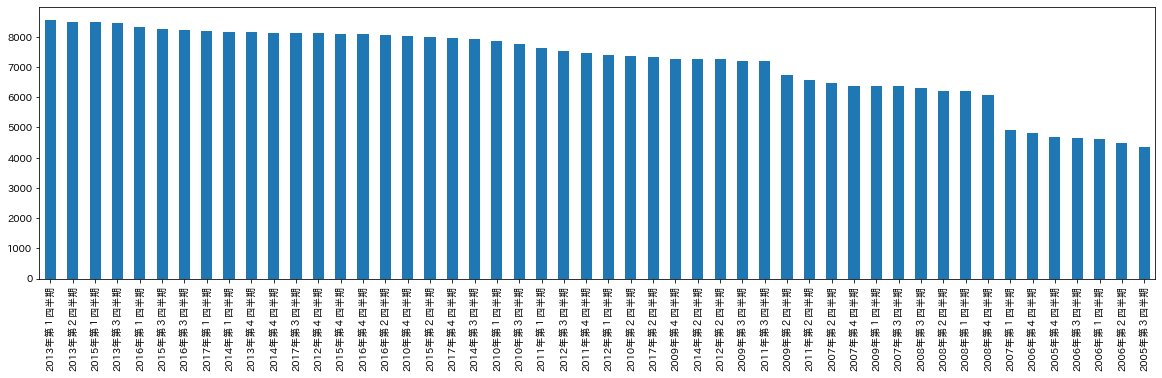

In [140]:
train["取引時点"].value_counts().plot.bar(figsize=(20, 5))
# trainが3-7年前のデータが多いのに対し、testは1-2年前のデータが多い。

<AxesSubplot:>

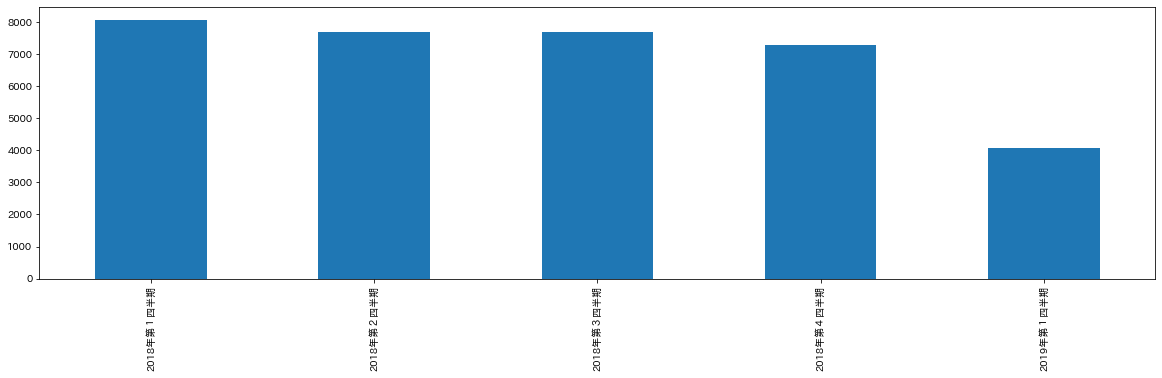

In [141]:
test["取引時点"].value_counts().plot.bar(figsize=(20, 5))

,取引時点,y
0,2005年第３四半期,77.409979
1,2005年第４四半期,82.610660
2,2006年第１四半期,83.418398
3,2006年第２四半期,88.208985
4,2006年第３四半期,101.248971
5,2006年第４四半期,82.179396
6,2007年第１四半期,105.886966
7,2007年第２四半期,86.189516
8,2007年第３四半期,89.394252
9,2007年第４四半期,84.475360


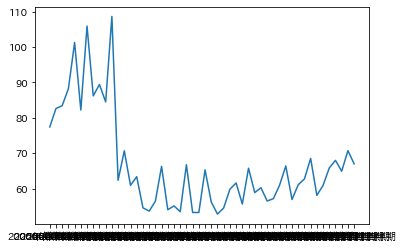

In [150]:
ts = train.groupby('取引時点', as_index=False).agg({'y': 'mean'})
ts = ts.sort_values("取引時点")
display(plt.plot(ts["取引時点"], ts["y"]))
ts

## 改装

<AxesSubplot:>

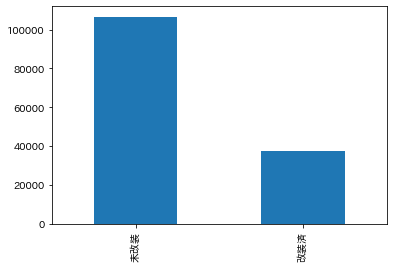

In [143]:
train["改装"].value_counts().plot.bar()

<AxesSubplot:>

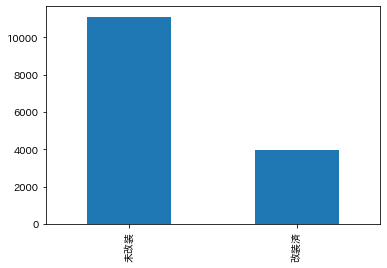

In [144]:
test["改装"].value_counts().plot.bar()

## 取引の事情等

<AxesSubplot:>

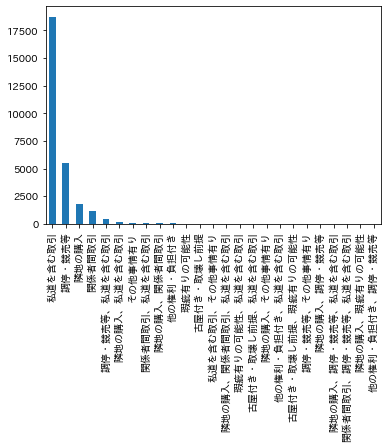

In [145]:
train["取引の事情等"].value_counts().plot.bar()

<AxesSubplot:>

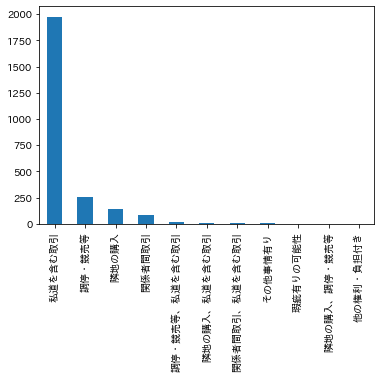

In [146]:
test["取引の事情等"].value_counts().plot.bar()

## y

<AxesSubplot:>

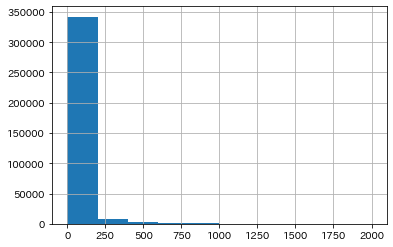

In [147]:
train["y"].hist(range=(0, 2000))

In [152]:
import copy
df = copy.deepcopy(train)
df = df[df["取引時点"] != "2005年第３四半期"]
df = df[df["取引時点"] != "2005年第４四半期"]
df = df[df["取引時点"] != "2006年第１四半期"]
df = df[df["取引時点"] != "2006年第２四半期"]
df = df[df["取引時点"] != "2006年第３四半期"]
df = df[df["取引時点"] != "2006年第４四半期"]
df = df[df["取引時点"] != "2007年第１四半期"]
df = df[df["取引時点"] != "2007年第２四半期"]
df = df[df["取引時点"] != "2007年第３四半期"]
df = df[df["取引時点"] != "2007年第４四半期"]
df = df[df["取引時点"] != "2008年第１四半期"]
df = df[df["取引時点"] != "2008年第２四半期"]
df = df[df["取引時点"] != "2008年第３四半期"]
print(len(train),len(df))

356344 285931


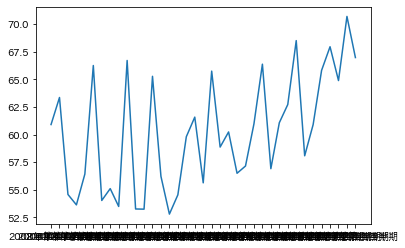

In [153]:
ts = df.groupby('取引時点', as_index=False).agg({'y': 'mean'})
ts = ts.sort_values("取引時点")
display(plt.plot(ts["取引時点"], ts["y"]))

## train, testとpublishedデータのcolumnの対応づけのmemo

pair = [("所在地コード","市区町村コード"),("建蔽率","建ぺい率（％）"),("容積率","容積率（％）"),("駅名","最寄駅：名称"), ("地積","面積（㎡）"),("市区町村名","市区町村名"),('前面道路の幅員','前面道路：幅員（ｍ）'), ("前面道路の方位区分","前面道路：方位"),("前面道路区分","前面道路：種類"),("形状区分","土地の形状"), ("用途区分","都市計画")]
檜原村：緯度: 35.726822 経度: 139.14886
奥多摩町：緯度: 35.809502 経度: 139.096059

